In [ ]:
# Importando as bibliotecas necessárias para que seja feita a análise exploratória de dados

import requests
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

**Link da base de dados:** https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [ ]:
# Lendo a base de dados e visualizando o seu cabeçalho

df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Visualizando a quantidade de linhas e colunas na base de dados

numero_var = df.shape[1]
numero_obs = df.shape[0]

print(f"A base de dados possui {numero_var} colunas e {numero_obs} linhas")

A base de dados possui 13 colunas e 374 linhas


In [ ]:
# Verificando os tipos de variáveis

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Healthy') # Preenchendo valores 'NA' como saudáveis
df['Person ID'] = df['Person ID'].astype('object') # ID tipo categórico

df.dtypes

,0
Person ID,object
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [ ]:
# Verificando os dados faltantes na base

df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
# Verificando informações estatísticas usando o 'describe'

df_semID = df.drop("Person ID", axis = 1, inplace = False)

df_semID.describe() # Como 'Person ID' é um identificador e não um valor quantitativo propriamente, ele fora desconsiderado.



,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
# Matrizes de covariância e de correlação das variáveis numéricas

var_numericas = df_semID.select_dtypes(include = ['float64', 'int64'])

matriz_cov = var_numericas.cov()
matriz_corr = var_numericas.corr()

print(f'A matriz de covariância abaixo:\n{matriz_cov}')
print('\n')
print(f'A matriz de correlação abaixo:\n{matriz_corr}')

A matriz de covariância abaixo:
                                Age  Sleep Duration  Quality of Sleep  \
Age                       75.223244        2.378783          4.918001   
Sleep Duration             2.378783        0.633070          0.841142   
Quality of Sleep           4.918001        0.841142          1.432703   
Physical Activity Level   32.338318        3.519696          4.809594   
Stress Level              -6.500179       -1.145095         -1.908976   
Heart Rate                -8.092328       -1.699435         -3.266476   
Daily Steps              813.505900      -50.890453         32.517813   

                         Physical Activity Level  Stress Level  Heart Rate  \
Age                                    32.338318     -6.500179   -8.092328   
Sleep Duration                          3.519696     -1.145095   -1.699435   
Quality of Sleep                        4.809594     -1.908976   -3.266476   
Physical Activity Level               433.922381     -1.261774   11.799

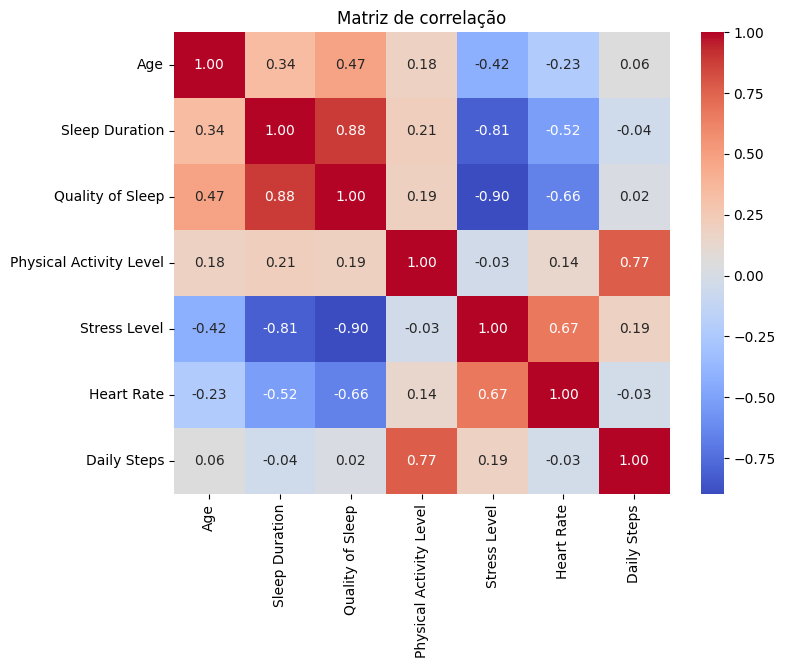

In [ ]:
# Matriz de correlação em mapa de calor

plt.figure(figsize = (8, 6))
sns.heatmap(matriz_corr, annot = True, cmap = 'coolwarm', fmt = '.2f')

plt.title('Matriz de correlação')
plt.show()

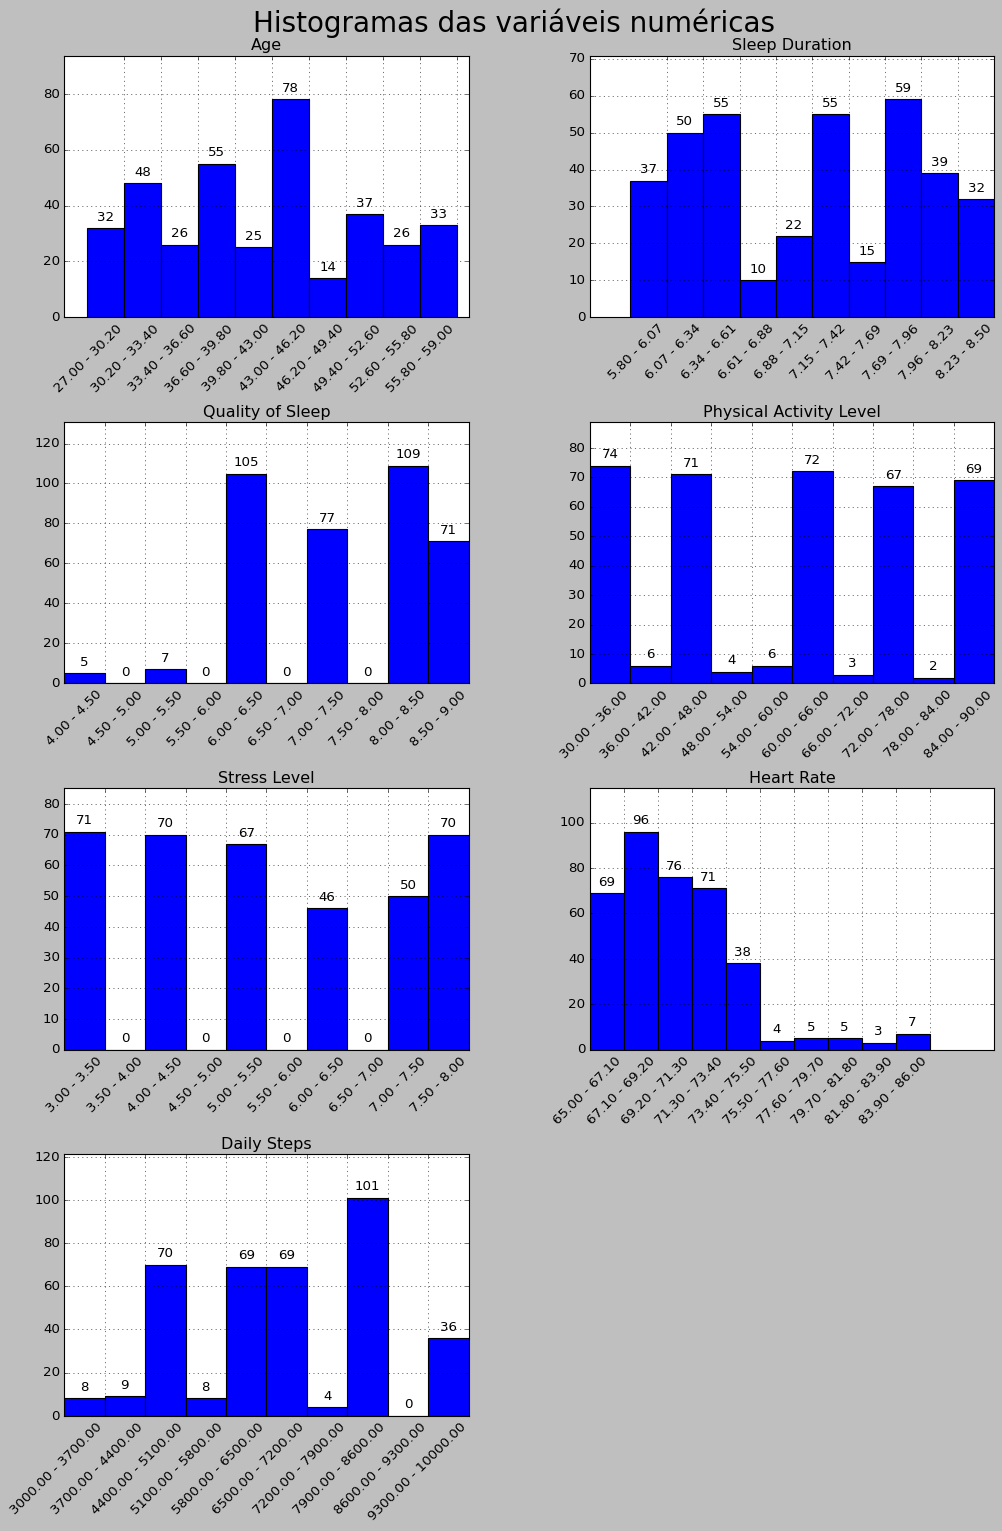

In [ ]:
# Histogramas das variáveis numéricas

plt.style.use('classic')

var_numericas = df_semID.select_dtypes(include = ['float64', 'int64'])

var_numericas.hist(bins = 10, edgecolor = 'black', figsize = (15, 20), layout = (4, 2))

for ax in plt.gcf().axes:
  for p in ax.patches:
      ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  if ax.patches:
    ymax = max([p.get_height() for p in ax.patches]) # Ajeita a altura das barras dentro do espaço do gráfico
    ax.set_ylim(0, ymax * 1.2)
    xticks = [(p.get_x() + p.get_width()) for p in ax.patches]
    xticklabels = [f'{p.get_x():.2f} - {p.get_x() + p.get_width():.2f}' for p in ax.patches]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=45, ha='right')

plt.subplots_adjust(hspace=0.4, top=0.95)  # Aumenta o espaçamento vertical entre os histogramas
plt.suptitle('Histogramas das variáveis numéricas', fontsize = 25)
plt.grid(False)
plt.show()


<ipython-input-12-8edb0c158ac0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df['Occupation'].value_counts().index, rotation=45, ha='right')


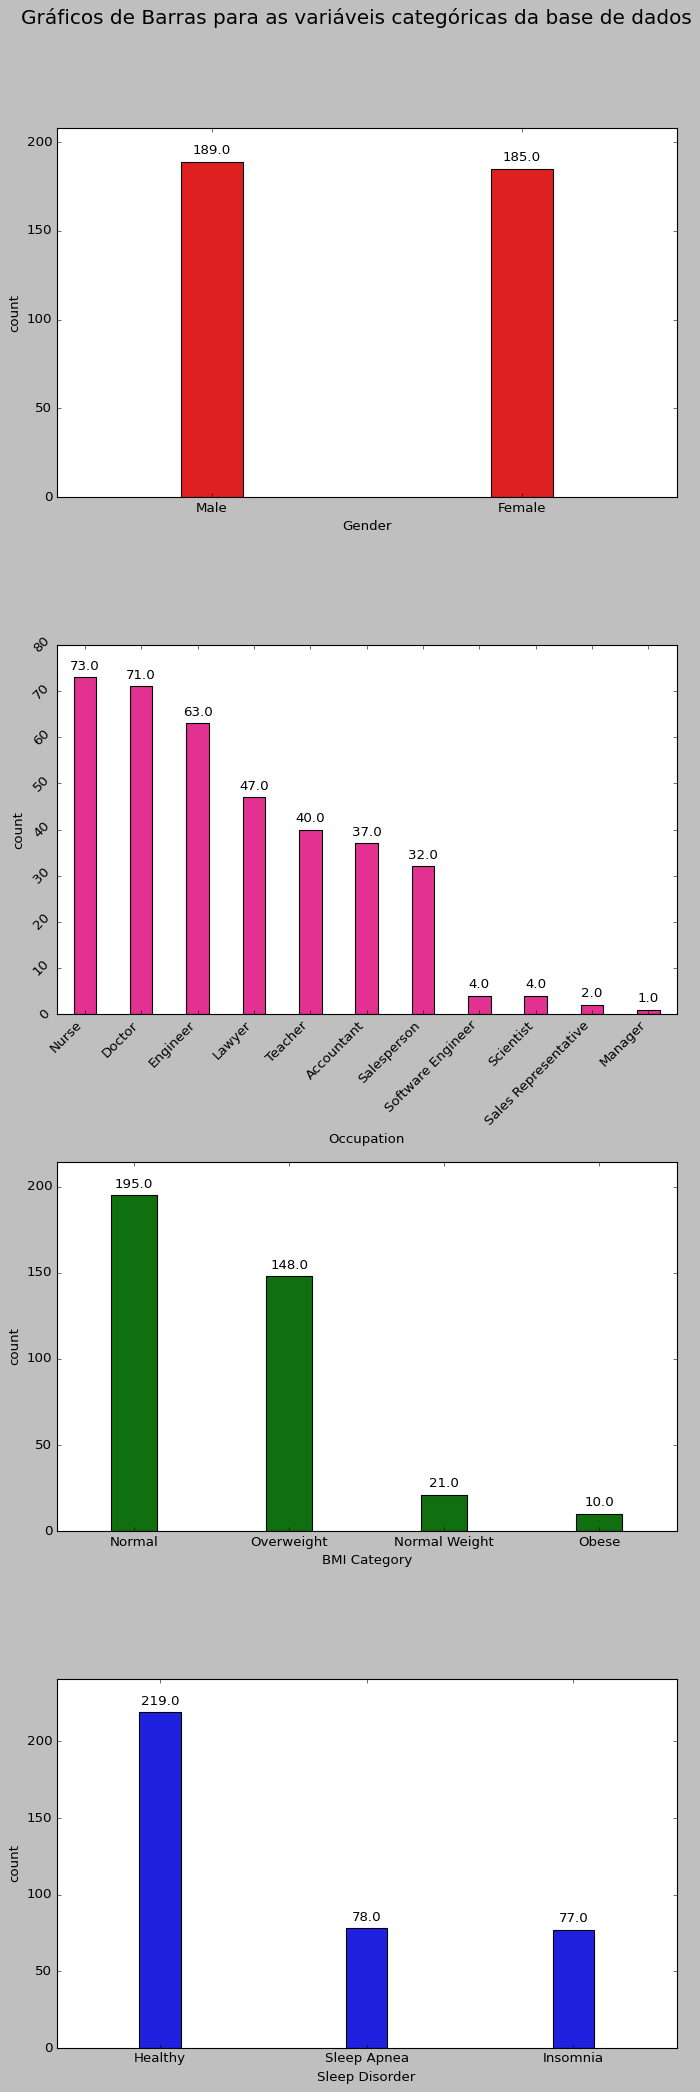

In [ ]:
# Gráfico de barras para as variáveis categóricas

fig, axes = plt.subplots(4, 1, figsize = (10, 30))
fig.suptitle('Gráficos de Barras para as variáveis categóricas da base de dados', fontsize = 18, y = 0.95)

sns.countplot(ax = axes[0], x = 'Gender', data = df, color = 'red',
              order = df['Gender'].value_counts().index, width = 0.2)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points') # Esse for fornece os valores numéricos acima das barras
if axes[0].patches:
  ymax = max([p.get_height() for p in axes[0].patches])
  axes[0].set_ylim(0, ymax * 1.1)  # Define o limite superior como 110% do valor máximo

sns.countplot(ax = axes[1], x = 'Occupation', data = df, color = 'deeppink',
              order = df['Occupation'].value_counts().index, width = 0.4);
axes[1].set_xticklabels(df['Occupation'].value_counts().index, rotation=45, ha='right')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points') # Esse for fornece os valores numéricos acima das barras

sns.countplot(ax = axes[2], x = 'BMI Category', data = df, color = 'green',
              order = df['BMI Category'].value_counts().index, width = 0.3);
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points') # Esse for fornece os valores numéricos acima das barras
if axes[2].patches:
  ymax = max([p.get_height() for p in axes[2].patches])
  axes[2].set_ylim(0, ymax * 1.1)  # Define o limite superior como 110% do valor máximo

sns.countplot(ax = axes[3], x = 'Sleep Disorder', data = df, color = 'blue',
              order = df['Sleep Disorder'].value_counts().index, width = 0.2);
for p in axes[3].patches:
    axes[3].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points') # Esse for fornece os valores numéricos acima das barras
if axes[3].patches:
  ymax = max([p.get_height() for p in axes[3].patches])
  axes[3].set_ylim(0, ymax * 1.1)  # Define o limite superior como 110% do valor máximo

plt.subplots_adjust(hspace=0.4)  # Aumenta o espaçamento vertical

axes[0].tick_params(labelrotation=0);
axes[1].tick_params(labelrotation=45);
axes[2].tick_params(labelrotation=0);
axes[3].tick_params(labelrotation=0);

# Remove o último gráfico que está em branco
